In [34]:
import os
import pickle
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
epsilon_list = [0.1, 1, 5, 10, 50, 100, 500, 1000, 5000, 10000]

In [4]:
with open(os.path.join("./ncc_outputs", "categorical_results.pkl"), "rb") as f:
    result_categorical = pickle.load(f) 

In [15]:
misclassification_rate = [misclassification_rate.item() for misclassification_rate in result_categorical]
misclassification_rate

[0.9786893979754928,
 0.9783342212750844,
 0.9770911028236547,
 0.9779790445746759,
 0.9325164269223939,
 0.880127863612147,
 0.5698810158053631,
 0.35908364411294624,
 0.07565263718700055,
 0.04066773219676789]

Text(0, 0.5, 'misclassification rate')

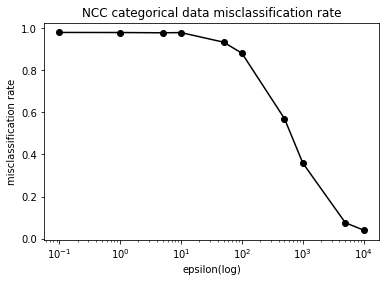

In [28]:
plt.plot(epsilon_list, misclassification_rate, "-ok")
plt.xscale("log")
plt.title("NCC categorical data misclassification rate")
plt.xlabel("epsilon(log)")
plt.ylabel("misclassification rate")

In [10]:
with open(os.path.join("./ncc_outputs", "continuous_results.pkl"), "rb") as f:
    result_continuous = pickle.load(f) 

Text(0, 0.5, 'MSE')

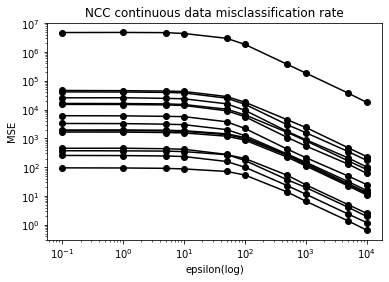

In [32]:
plt.plot(epsilon_list, result_continuous, "-ok")
plt.xscale("log")
plt.yscale("log")
plt.title("NCC continuous data misclassification rate")
plt.xlabel("epsilon(log)")
plt.ylabel("MSE")

In [47]:
with open(os.path.join("./ncc_outputs", "model_results.pkl"), "rb") as f:
    result_model = pd.DataFrame(pickle.load(f))

In [51]:
original_data_model = result_model[result_model["epsilon"] == 0]
dp_data_model = result_model[result_model["epsilon"] != 0]

Text(0.5, 1.0, 'NCC model accuracy')

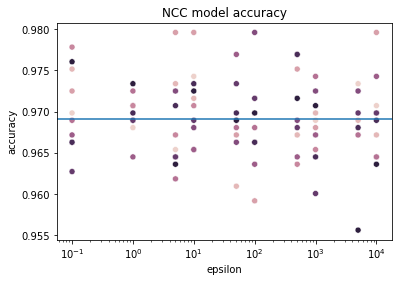

In [59]:
sns.scatterplot(data = dp_data_model, x = "epsilon", y = "accuracy", hue = "epoch")
plt.axhline(original_data_model["accuracy"].mean())
plt.xscale("log")
plt.legend().remove()
plt.title("NCC model accuracy")